## Principles and Applications of Data Science
## Spring 2021
## Homework 2
## Due Date: Jun 16, 2021

### Name: 吳承岳
### Student ID Number: 109598085

### Reading files, including all data files and a table file for for mapping station name to station ID ###

# Step 1
### 讀取檔案及準備對照表的字典物件

In [44]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
file_list_2017 = []
file_list_2018 = []

enter_2017 = []
enter_2018 = []
exit_2017 = []
exit_2018 = []
path = "HW2_data/"
file_list = os.listdir(path)
for f in file_list:
    if "2017" in f:
        file_list_2017.append(f)
    elif "2018" in f:
        file_list_2018.append(f)

for f in file_list_2017:
    print(f)
    
for f in file_list_2018:
    print(f)

correspond = pd.read_csv('HW2_data/Station ID.txt', header=None, sep='\t', names=['id', 'Mandarin'])
print( correspond.sample(20) )
correspond = correspond[['Mandarin', 'id']]
id_dict = correspond.set_index('Mandarin').to_dict()
id_dict

201701.csv
201702.csv
201703.csv
201704.csv
201705.csv
201706.csv
201707.csv
201708.csv
201709.csv
201710.csv
201711.csv
201712.csv
201801.csv
201802.csv
201803.csv
201804.csv
201805.csv
201806.csv
201807.csv
201808.csv
201809.csv
201810.csv
201811.csv
201812.csv
           id Mandarin
106      BL22       南港
8        BR12     中山國中
43        R28       淡水
14       BR18       文德
23    R05BR09       大安
71        O13      台北橋
2        BR03     萬芳社區
97       BL13      善導寺
107  BL23BR24    南港展覽館
83        O53     三民高中
53     G09O05       古亭
24        R06   大安森林公園
51        G07       公館
95    BL11G12       西門
22        R04     信義安和
60        G17    台北小巨蛋
63        O01      南勢角
65        O03     永安市場
100      BL16     忠孝敦化
73        O15       三重


{'id': {'動物園': 'BR01',
  '木柵': 'BR02',
  '萬芳社區': 'BR03',
  '萬芳醫院': 'BR04',
  '辛亥': 'BR05',
  '麟光': 'BR06',
  '六張犁': 'BR07',
  '科技大樓': 'BR08',
  '中山國中': 'BR12',
  '松山機場': 'BR13',
  '大直': 'BR14',
  '劍南路': 'BR15',
  '西湖': 'BR16',
  '港墘': 'BR17',
  '文德': 'BR18',
  '內湖': 'BR19',
  '大湖公園': 'BR20',
  '葫洲': 'BR21',
  '東湖': 'BR22',
  '南港軟體園區': 'BR23',
  '象山': 'R02',
  '台北101/世貿': 'R03',
  '信義安和': 'R04',
  '大安': 'R05BR09',
  '大安森林公園': 'R06',
  '東門': 'R07O06',
  '台大醫院': 'R09',
  '雙連': 'R12',
  '圓山': 'R14',
  '劍潭': 'R15',
  '士林': 'R16',
  '芝山': 'R17',
  '明德': 'R18',
  '石牌': 'R19',
  '唭哩岸': 'R20',
  '奇岩': 'R21',
  '北投': 'R22',
  '新北投': 'R22A',
  '復興崗': 'R23',
  '忠義': 'R24',
  '關渡': 'R25',
  '竹圍': 'R26',
  '紅樹林': 'R27',
  '淡水': 'R28',
  '新店': 'G01',
  '新店區公所': 'G02',
  '七張': 'G03',
  '小碧潭': 'G03A',
  '大坪林': 'G04',
  '景美': 'G05',
  '萬隆': 'G06',
  '公館': 'G07',
  '台電大樓': 'G08',
  '古亭': 'G09O05',
  '中正紀念堂': 'G10R08',
  '小南門': 'G11',
  '北門': 'G13',
  '中山': 'G14R11',
  '松江南京': 'G15O08',
  '南京復興': 'G16BR11

In [46]:
for f in file_list_2017:
    path_name = path + f
    dataframe = pd.read_csv( path_name, header=None, names=['date', 'hour', 'enter', 'exit', 'num'])
    
    # 進站人數
    enter = dataframe.drop(columns=['date','hour', 'exit'])
    enter = enter.groupby(by=['enter']).sum().sort_values(by=['num'],ascending=False).head(10).reset_index()
    enter['id'] = enter['enter'].map(id_dict['id'])
    enter = enter[['id', 'enter', 'num']]
    enter_2017.append(enter)
    
    #出站人數
    exit = dataframe.drop(columns=['date','hour', 'enter'])
    exit = exit.groupby(by=['exit']).sum().sort_values(by=['num'],ascending=False).head(10).reset_index()
    exit['id'] = exit['exit'].map(id_dict['id'])
    exit = exit[['id', 'exit', 'num']]
    exit_2017.append(exit)
    
    print(path_name + " finished")

for f in file_list_2018:
    path_name = path + f
    dataframe = pd.read_csv( path_name, header=None, names=['date', 'hour', 'enter', 'exit', 'num'])
    
    # 進站人數
    enter = dataframe.drop(columns=['date','hour', 'exit'])
    enter = enter.groupby(by=['enter']).sum().sort_values(by=['num'],ascending=False).head(10).reset_index()
    enter['id'] = enter['enter'].map(id_dict['id'])
    enter = enter[['id', 'enter', 'num']]
    enter_2018.append(enter)
    
    #出站人數
    exit = dataframe.drop(columns=['date','hour', 'enter'])
    exit = exit.groupby(by=['exit']).sum().sort_values(by=['num'],ascending=False).head(10).reset_index()
    exit['id'] = exit['exit'].map(id_dict['id'])
    exit = exit[['id', 'exit', 'num']]
    exit_2018.append(exit)
    
    print(path_name + " finished")

HW2_data/201701.csv finished
HW2_data/201702.csv finished
HW2_data/201703.csv finished
HW2_data/201704.csv finished
HW2_data/201705.csv finished
HW2_data/201706.csv finished
HW2_data/201707.csv finished
HW2_data/201708.csv finished
HW2_data/201709.csv finished
HW2_data/201710.csv finished
HW2_data/201711.csv finished
HW2_data/201712.csv finished
HW2_data/201801.csv finished
HW2_data/201802.csv finished
HW2_data/201803.csv finished
HW2_data/201804.csv finished
HW2_data/201805.csv finished
HW2_data/201806.csv finished
HW2_data/201807.csv finished
HW2_data/201808.csv finished
HW2_data/201809.csv finished
HW2_data/201810.csv finished
HW2_data/201811.csv finished
HW2_data/201812.csv finished


# Step 2
### 繪製圖片 2017

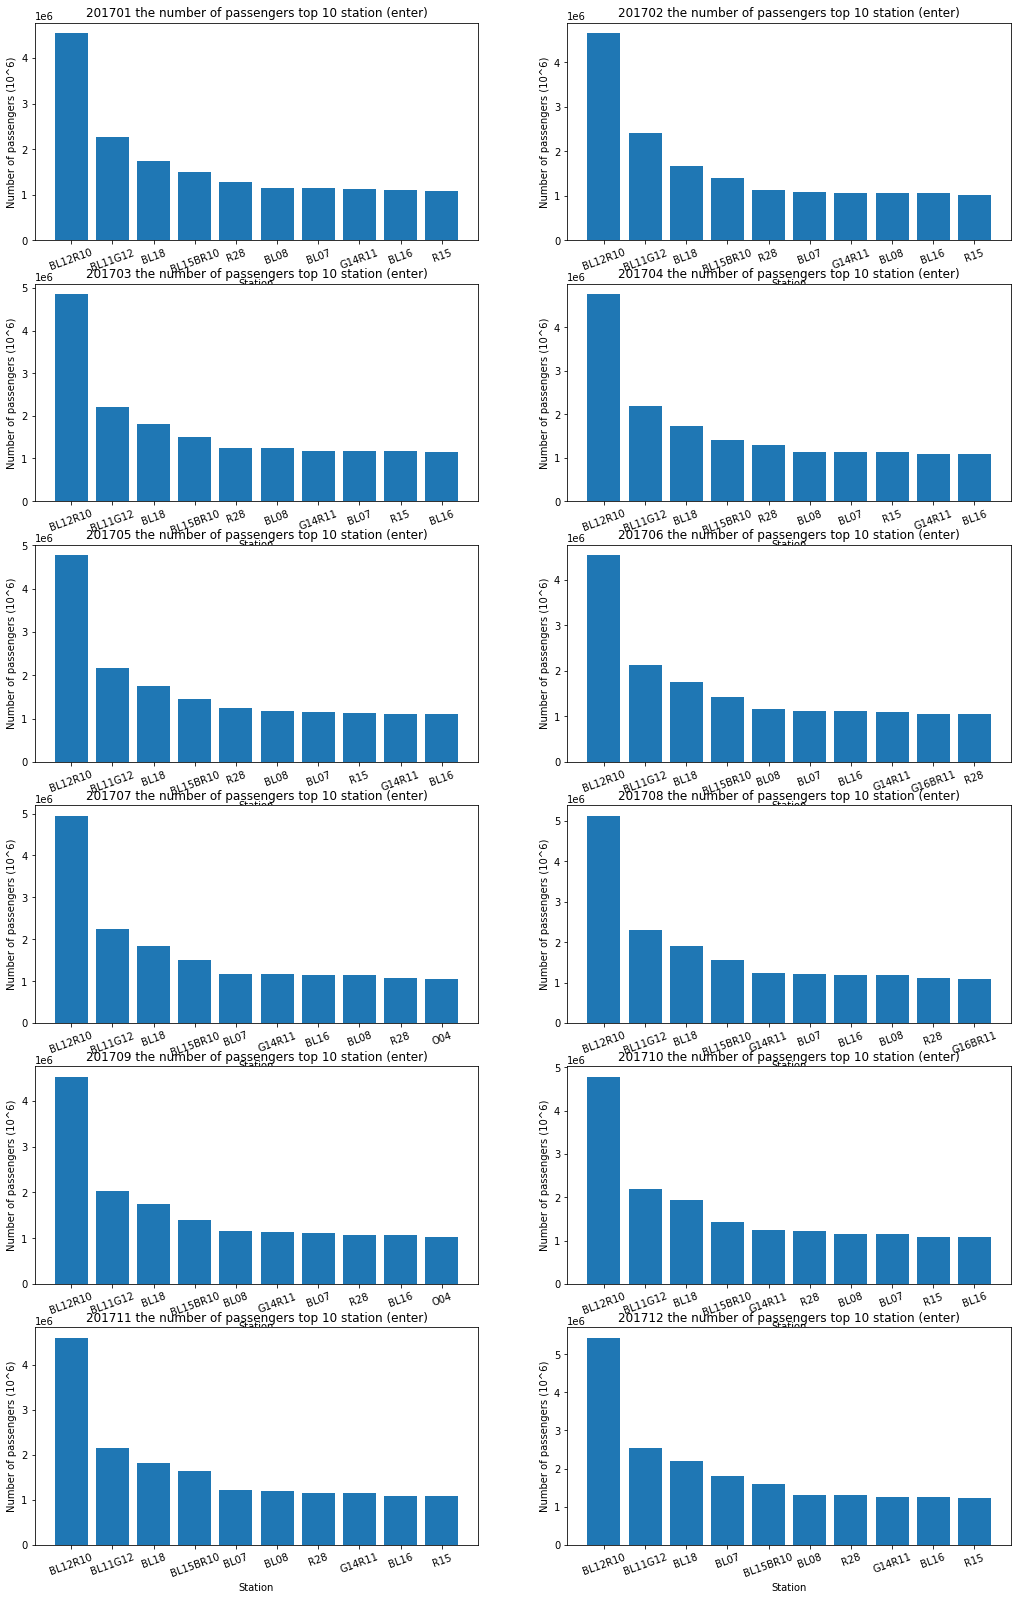

In [47]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(17.5,28))
for i in range(12):
    x = np.arange(len(enter_2017[i]['id']))
    # x = np.arange( 0, 20, 2 )
    plt.sca(axes[int(i/2), i%2])
    # plt.figure(figsize=(7.5,5))
    plt.bar(x, enter_2017[i]['num'])
    plt.xticks(x, enter_2017[i]['id'], rotation=20)
    plt.xlabel('Station')
    plt.ylabel('Number of passengers (10^6)')
    plt.title(file_list_2017[i].replace(".csv", "") + " the number of passengers top 10 station (enter)")

plt.savefig('2017_enter.jpg')
plt.show()

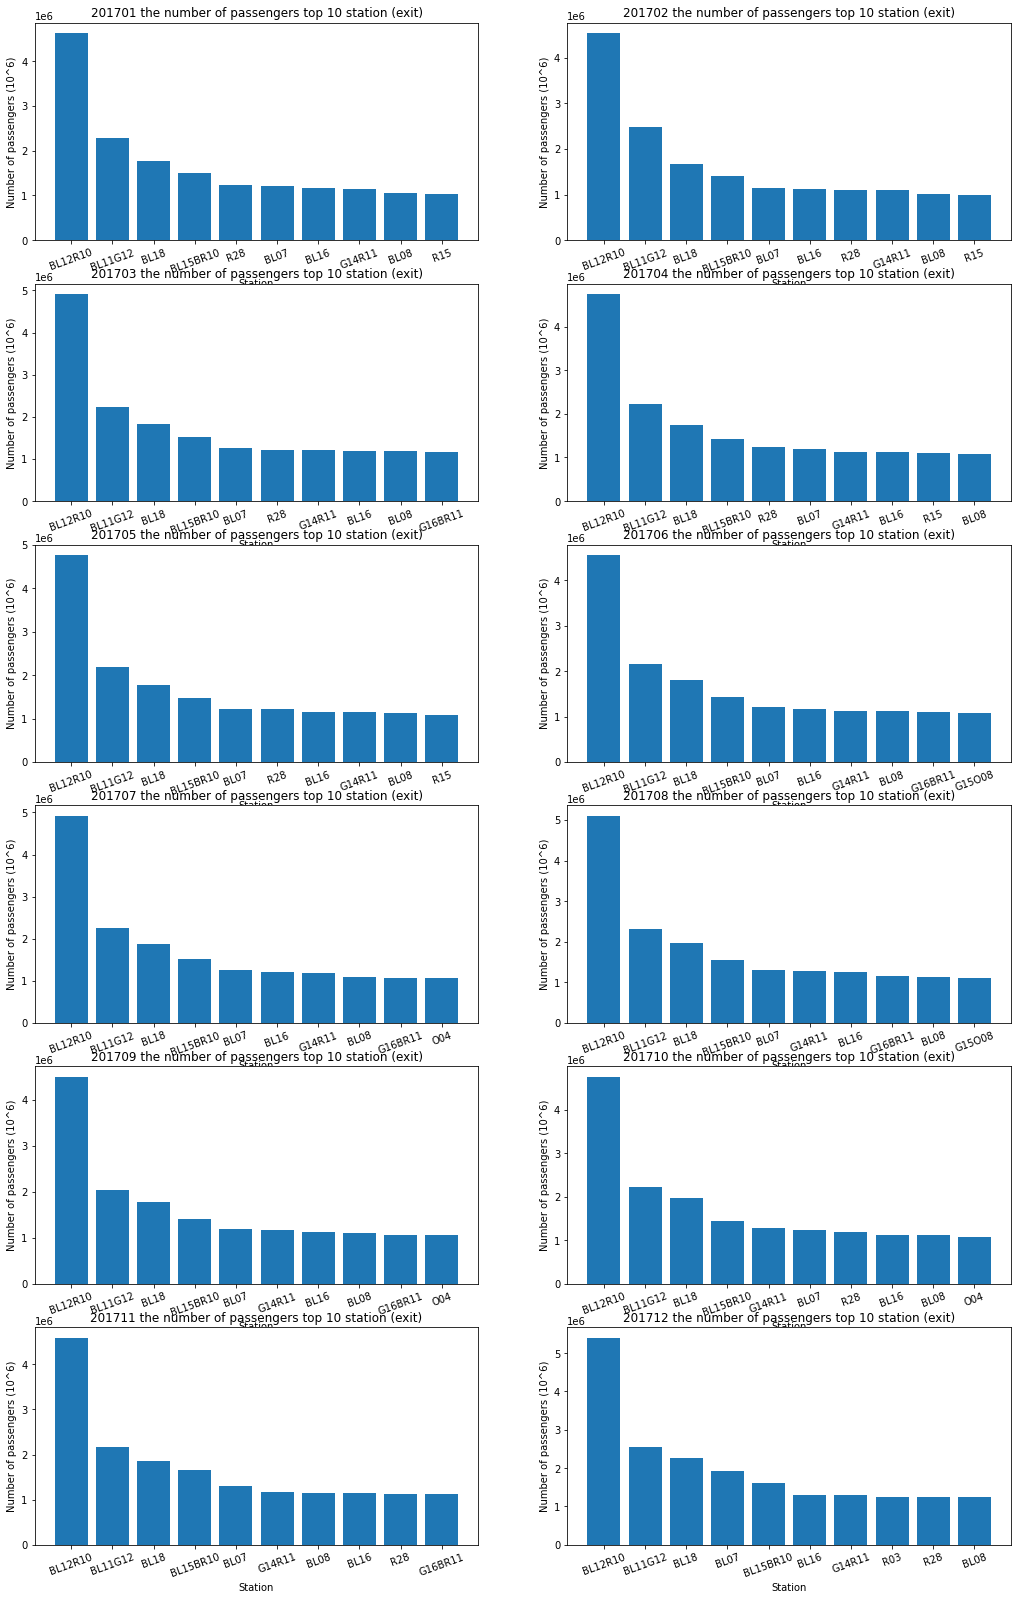

In [48]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(17.5,28))
for i in range(12):
    x = np.arange(len(exit_2017[i]['id']))
    # x = np.arange( 0, 20, 2 )
    plt.sca(axes[int(i/2), i%2])
    # plt.figure(figsize=(7.5,5))
    plt.bar(x, exit_2017[i]['num'])
    plt.xticks(x, exit_2017[i]['id'], rotation=20)
    plt.xlabel('Station')
    plt.ylabel('Number of passengers (10^6)')
    plt.title(file_list_2017[i].replace(".csv", "") + " the number of passengers top 10 station (exit)")

plt.savefig('2017_exit.jpg')
plt.show()

# Step 3
### 繪製圖片 2018

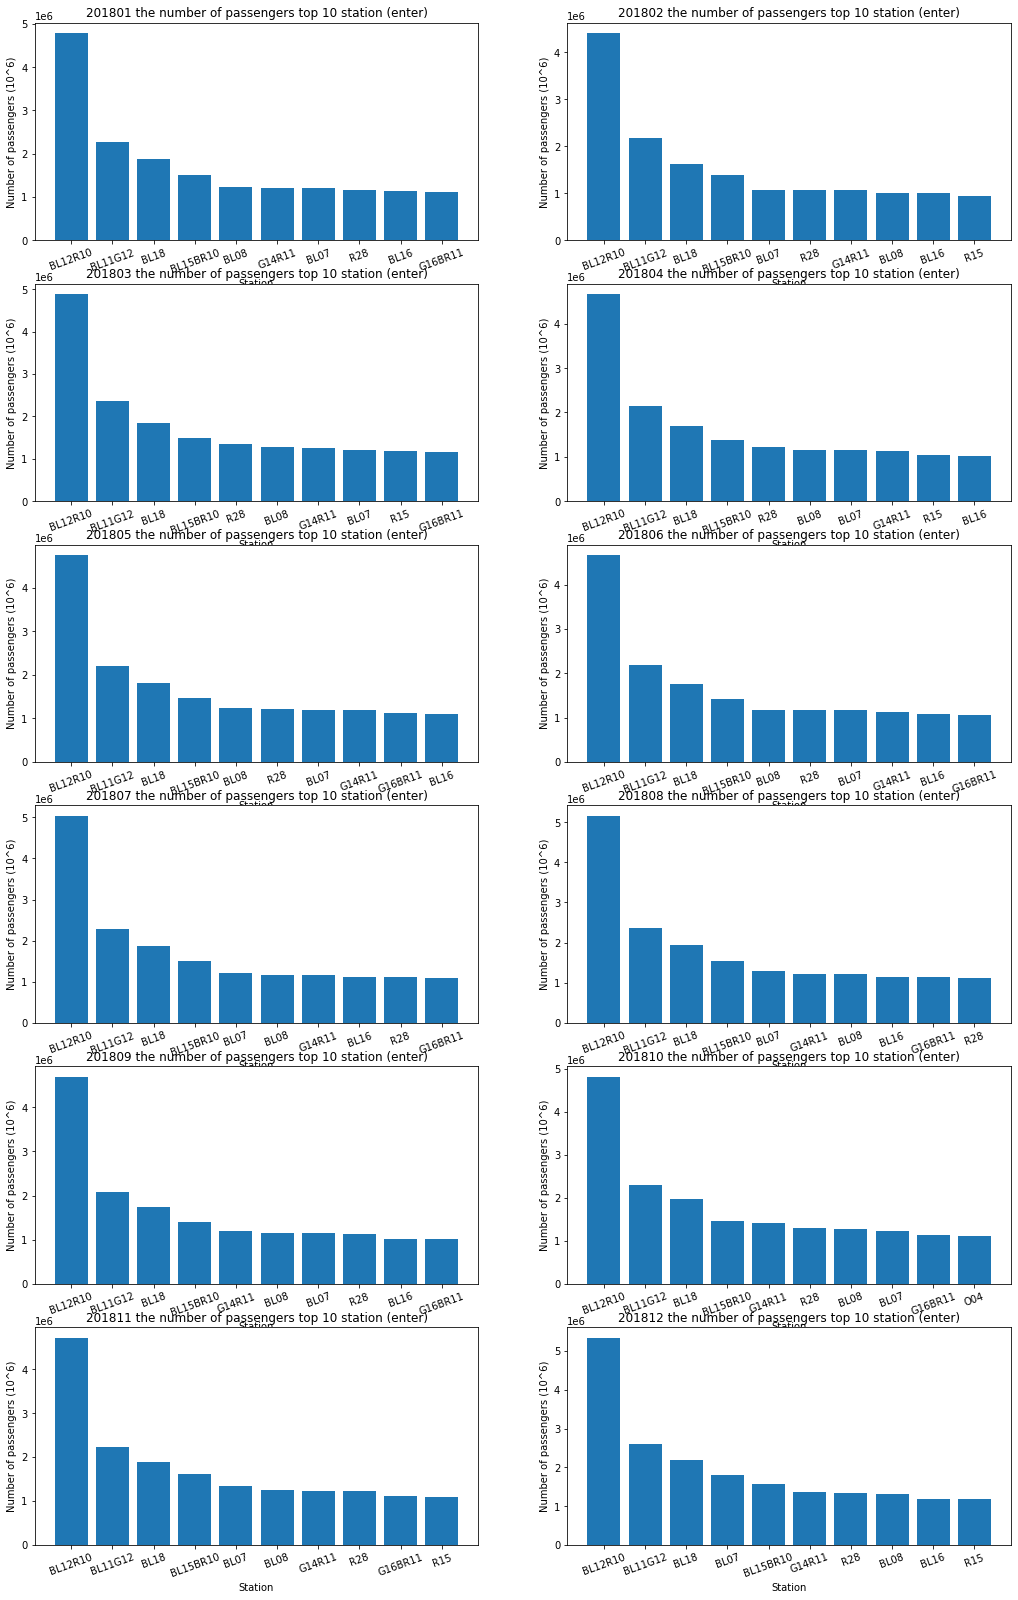

In [49]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(17.5,28))
for i in range(12):
    x = np.arange(len(enter_2018[i]['id']))
    # x = np.arange( 0, 20, 2 )
    plt.sca(axes[int(i/2), i%2])
    # plt.figure(figsize=(7.5,5))
    plt.bar(x, enter_2018[i]['num'])
    plt.xticks(x, enter_2018[i]['id'], rotation=20)
    plt.xlabel('Station')
    plt.ylabel('Number of passengers (10^6)')
    plt.title(file_list_2018[i].replace(".csv", "") + " the number of passengers top 10 station (enter)")

plt.savefig('2018_enter.jpg')
plt.show()

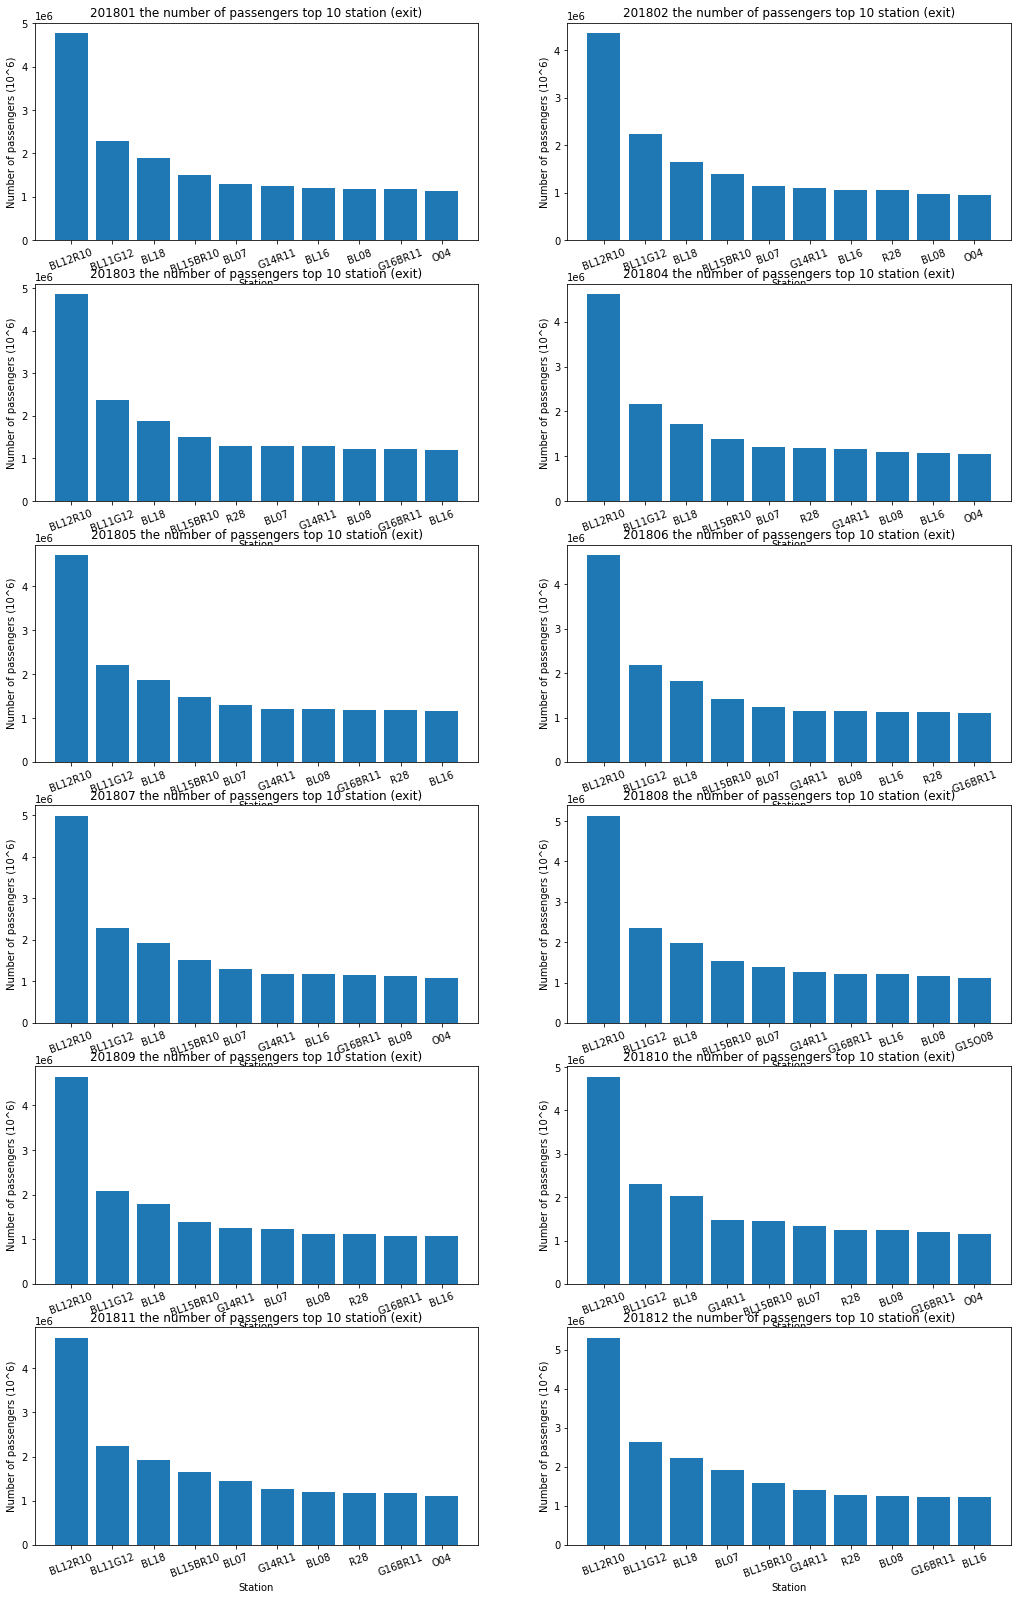

In [50]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(17.5,28))
for i in range(12):
    x = np.arange(len(exit_2018[i]['id']))
    # x = np.arange( 0, 20, 2 )
    plt.sca(axes[int(i/2), i%2])
    # plt.figure(figsize=(7.5,5))
    plt.bar(x, exit_2018[i]['num'])
    plt.xticks(x, exit_2018[i]['id'], rotation=20)
    plt.xlabel('Station')
    plt.ylabel('Number of passengers (10^6)')
    plt.title(file_list_2018[i].replace(".csv", "") + " the number of passengers top 10 station (exit)")

plt.savefig('2018_exit.jpg')
plt.show()